In [17]:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import numpy as np #numerical python used for working with arrays, mathematical operations
import time #useful for timing functions
import sys
import glob #glob is helpful for searching for filenames or directories
import scipy #scientific python
import pickle #for saving data
import skimage
from skimage import io
from importlib import reload
from itertools import chain, groupby
from skimage.filters import threshold_otsu, threshold_local

### Reading in the data

To read in the data, we use the `scikit-image` (aka `skimage`) module. This module has a bunch of image processing routines and more information on it can be found [here](https://scikit-image.org/).

<IPython.core.display.Javascript object>


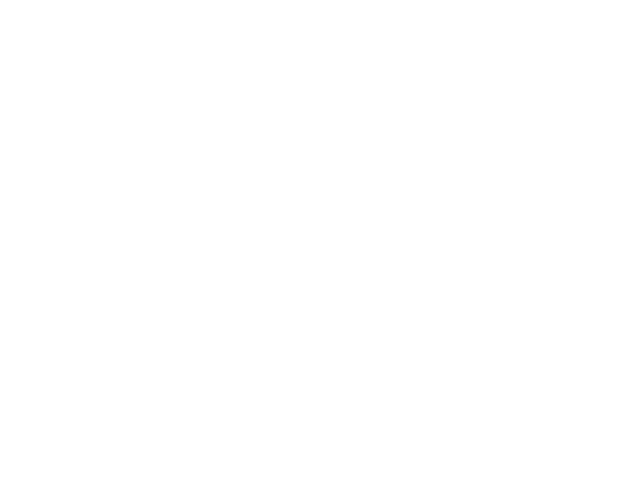

In [5]:
#Specify where the data is stored and the image data filename. Must be in tiff format
data_dir = "Y:\\Dennis Terwilliger\\Data\\2021-06-07\\02_temp ramp_10Hz_(23-35Deg)_(35-23Deg)2x\\"
sub_dir = "02_Temp ramp_10Hz_(23-35Deg)2x_2\\"
data_file = "02_Temp ramp_10Hz_(23-35Deg)2x_2_MMStack_Default.ome.tif"

#Image read using tiff_file module
im = skimage.io.imread(data_dir+sub_dir+data_file)

#Display the second frame of the image
plt.matshow(im[1], cmap=matplotlib.cm.gray)

#### Generating a binary image

We'll try a couple different thersholding methods to give us a binary image. 

You can read more on these [image filtering techniques here](https://scikit-image.org/docs/dev/auto_examples/applications/plot_thresholding.html). 

Determined a threshold value of 9168


<IPython.core.display.Javascript object>


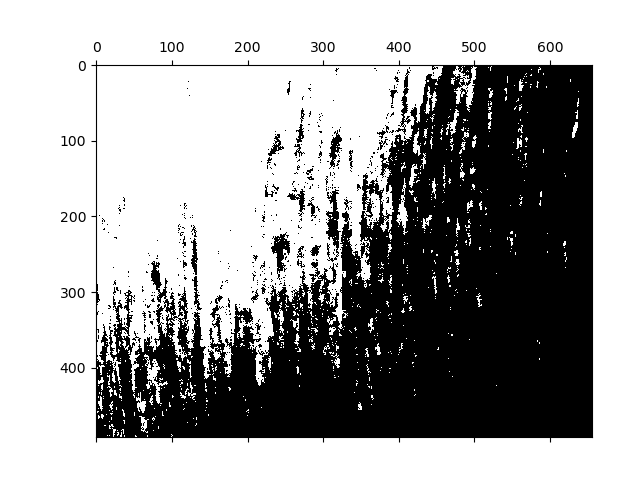

In [9]:
frame_number = 100
threshold_value = threshold_otsu(im[frame_number])
print("Determined a threshold value of %i" % threshold_value)
binary_image = im[frame_number] > threshold_value

#Display the binary image
plt.matshow(binary_image, cmap=matplotlib.cm.gray)

<IPython.core.display.Javascript object>


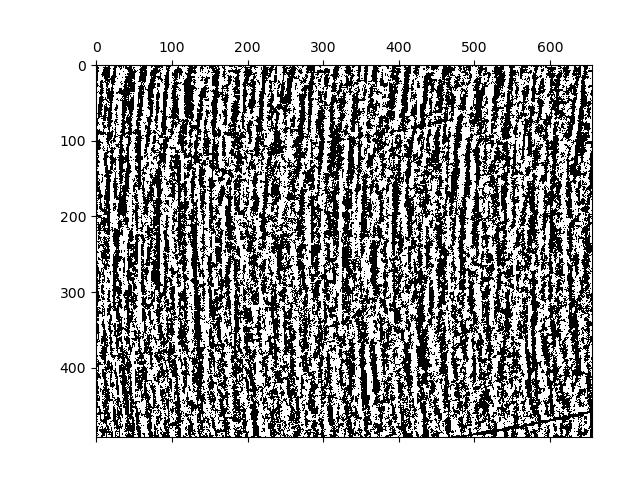

In [14]:
frame_number = 100
block_size = 35
local_thresh = threshold_local(im[frame_number], block_size, offset=10)
binary_image = im[frame_number] > local_thresh

#Display the binary image
plt.matshow(binary_image, cmap=matplotlib.cm.gray)

In [15]:
binary_image.shape

(492, 656)

In [74]:
def run_length(iterable):
    zero_runs = []
    for val, thing in groupby(iterable):
        if val==0:
            zero_runs.append(len(list(thing)))
    return zero_runs

In [75]:
def run_length_all_images(ims, block_size=35, offset_for_threshold=10):
    num_frames,vertical_pixels,horizontal_pixels = ims.shape
    all_runs_vertical = []
    all_runs_horizontal = []
    for i in range(num_frames):
        local_thresh = threshold_local(ims[i], block_size, offset=offset_for_threshold)
        binary_image = ims[i] > local_thresh
        for j in range(horizontal_pixels):
            all_runs_vertical.append(run_length(binary_image[:,j]))
        for k in range(vertical_pixels):
            all_runs_horizontal.append(run_length(binary_image[k,:]))
    return (list(chain(*all_runs_vertical)), list(chain(*all_runs_horizontal)))

In [ ]:
av,ah = run_length_all_images(im)

In [64]:
temp = []
for i in range(binary_image.shape[1]):
    temp.append(run_length(binary_image[:,i]))
runs_of_black_vertical = list(chain(*temp))

temp = []
for i in range(binary_image.shape[0]):
    temp.append(run_length(binary_image[i,:]))
runs_of_black_horizontal = list(chain(*temp))

<IPython.core.display.Javascript object>


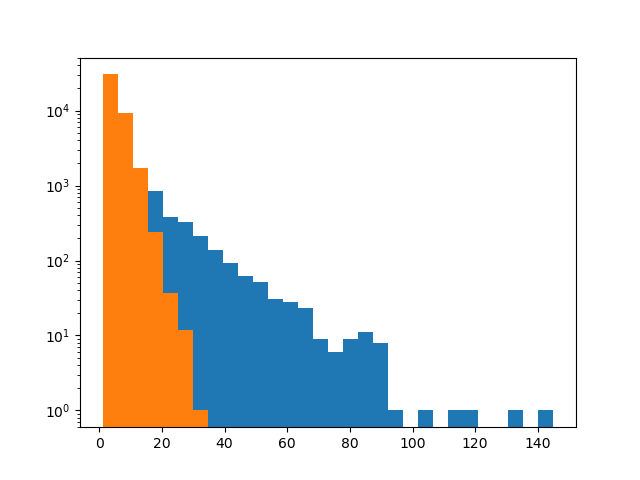

In [68]:
plt.figure()
n_vert,bins,_ = plt.hist(runs_of_black_vertical, bins=30, log=True)
n_hor,bins,_ = plt.hist(runs_of_black_horizontal, bins=bins, log=True)

In [65]:
plt.hist?